In [ ]:
##this work bool aims to work on multiple tab excel files  ,scraping shaping data and transforming it to long format

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt



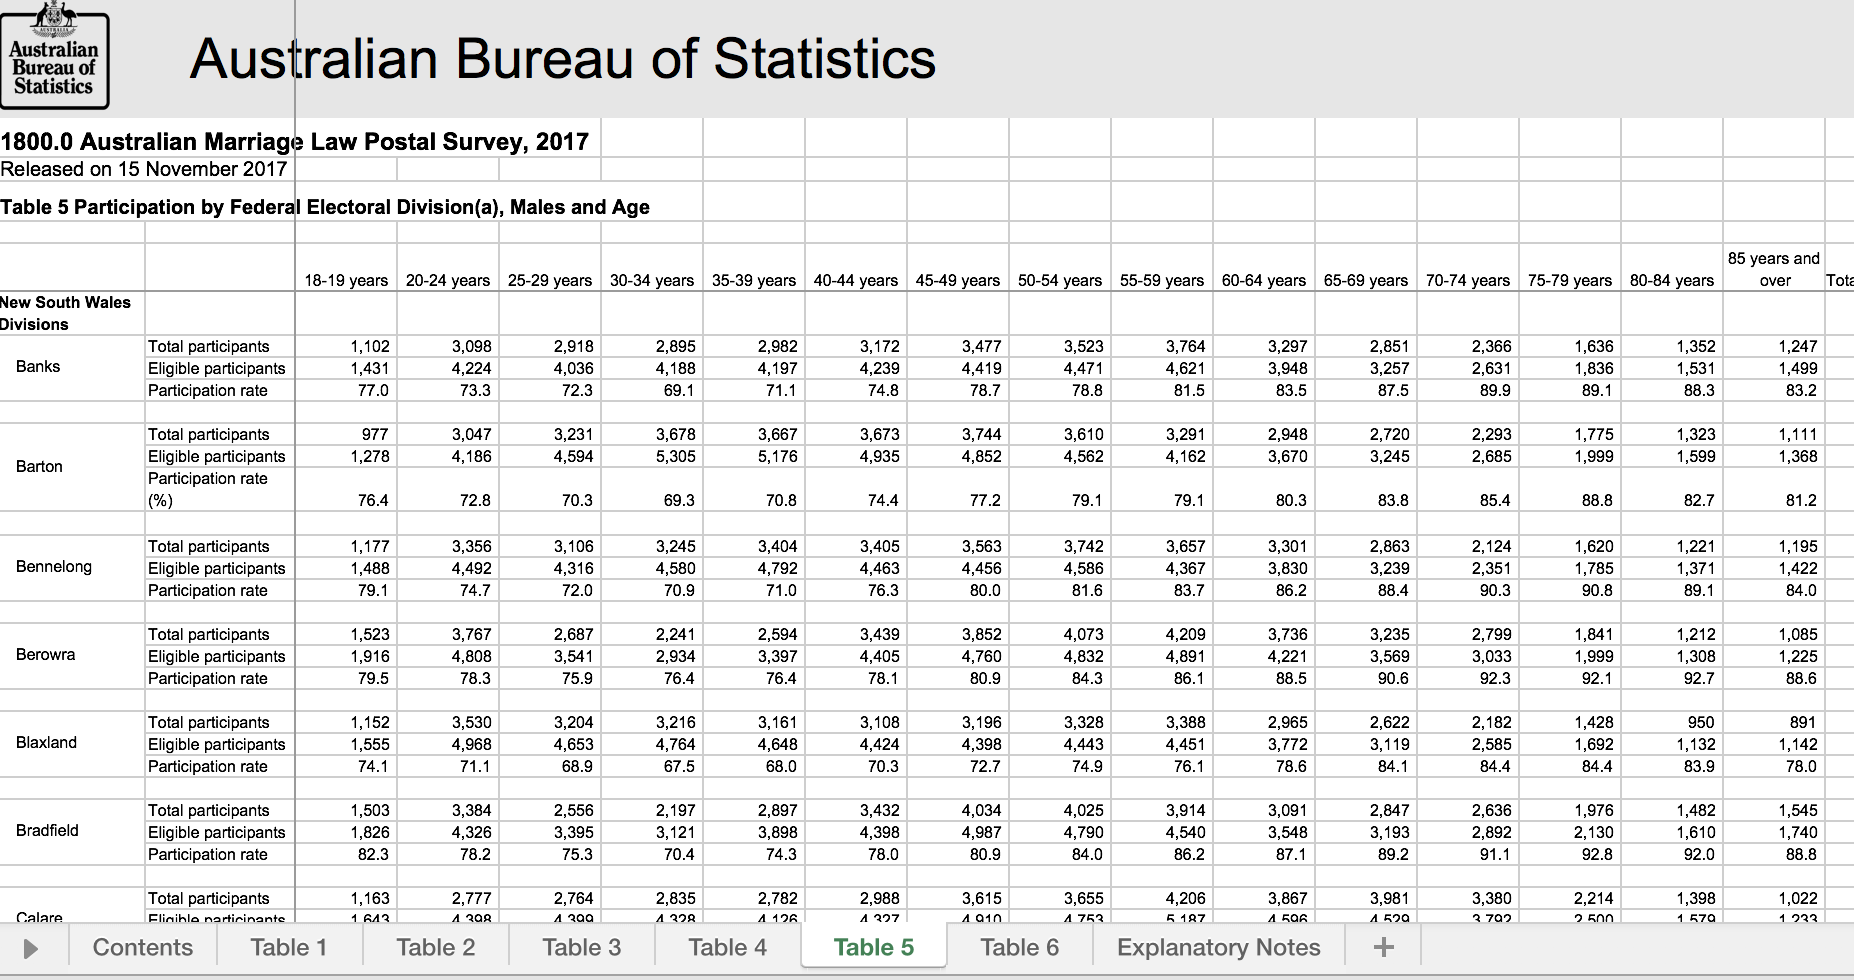

In [4]:

# Below is the display for customers with price ranges being colour-coded.# Below 
from IPython.display import Image
#How the file looked like at the beginning 
Image(filename='/Users/dilruba_p/Desktop/data/original_data.png')

In [56]:
data= pd.ExcelFile("/Users/dilruba_p/Desktop/data/australian_marriage.xls")
data.sheet_names[5:7]

['Table 5', 'Table 6']

In [38]:
tabnames=data.sheet_names[5:7]
df = [pd.read_excel("/Users/dilruba_p/Desktop/data/australian_marriage.xls", sheet_name=sheet) for sheet in tabnames]

In [57]:
df=data.parse(sheet_name='Table 5', skiprows=4)
## as can be seen data has problems  about merged cells and Nan rows  
df2=data.parse(sheet_name='Table 6', skiprows=4)
df['gender']='male'
df2['gender']='female'
df=df.append(df2)

In [ ]:
## to address merged cells issue   we have to implement a forward filling method for  replicating na values with the current cell name

In [58]:
data.parse(sheet_name='Table 5', skiprows=4)## since this data only includes information regarding male population


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,NaN,NaN,18-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85 years and over,Total Males(b)
1,New South Wales Divisions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Banks,Total participants,1102,3098,2918,2895,2982,3172,3477,3523,3764,3297,2851,2366,1636,1352,1247,39680
3,NaN,Eligible participants,1431,4224,4036,4188,4197,4239,4419,4471,4621,3948,3257,2631,1836,1531,1499,50528
4,NaN,Participation rate (%),77,73.3,72.3,69.1,71.1,74.8,78.7,78.8,81.5,83.5,87.5,89.9,89.1,88.3,83.2,78.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Barton,Total participants,977,3047,3231,3678,3667,3673,3744,3610,3291,2948,2720,2293,1775,1323,1111,41088
7,NaN,Eligible participants,1278,4186,4594,5305,5176,4935,4852,4562,4162,3670,3245,2685,1999,1599,1368,53616
8,NaN,Participation rate (%),76.4,72.8,70.3,69.3,70.8,74.4,77.2,79.1,79.1,80.3,83.8,85.4,88.8,82.7,81.2,76.6
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'gender'],
      dtype='object')

In [59]:
df.fillna(method='ffill', inplace=True)#we have to deal with merged cells with forwardfilling
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,gender
0,NaN,NaN,18-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85 years and over,Total Males(b),male
1,New South Wales Divisions,NaN,18-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85 years and over,Total Males(b),male
2,Banks,Total participants,1102,3098,2918,2895,2982,3172,3477,3523,3764,3297,2851,2366,1636,1352,1247,39680,male
3,Banks,Eligible participants,1431,4224,4036,4188,4197,4239,4419,4471,4621,3948,3257,2631,1836,1531,1499,50528,male
4,Banks,Participation rate (%),77,73.3,72.3,69.1,71.1,74.8,78.7,78.8,81.5,83.5,87.5,89.9,89.1,88.3,83.2,78.5,male
5,Banks,Participation rate (%),77,73.3,72.3,69.1,71.1,74.8,78.7,78.8,81.5,83.5,87.5,89.9,89.1,88.3,83.2,78.5,male
6,Barton,Total participants,977,3047,3231,3678,3667,3673,3744,3610,3291,2948,2720,2293,1775,1323,1111,41088,male
7,Barton,Eligible participants,1278,4186,4594,5305,5176,4935,4852,4562,4162,3670,3245,2685,1999,1599,1368,53616,male
8,Barton,Participation rate (%),76.4,72.8,70.3,69.3,70.8,74.4,77.2,79.1,79.1,80.3,83.8,85.4,88.8,82.7,81.2,76.6,male
9,Barton,Participation rate (%),76.4,72.8,70.3,69.3,70.8,74.4,77.2,79.1,79.1,80.3,83.8,85.4,88.8,82.7,81.2,76.6,male


In [63]:
df = df.rename(columns={'Unnamed: 0': 'Area', 'Unnamed: 1': 'Measure','Unnamed: 2': '18-19 years','Unnamed: 3':'20-24 years','Unnamed: 4':'25-29 years','Unnamed: 5':'30-34 years','Unnamed: 6':'35-39 years','Unnamed: 7':'40-44 years','Unnamed: 8':'45-49 years','Unnamed: 9':'50-54 years','Unnamed: 10':'55-59 years','Unnamed: 11':'60-64 years','Unnamed: 12':'65-69 years','Unnamed: 13':'70-74 years','Unnamed: 14':'75-79 years','Unnamed: 15':'80-84 years','Unnamed: 16':'85 years and over','Unnamed: 17':'Total Male'})

df = df.iloc[2:] ## I removed the first 2 rows 

# now we have to reset the index and get rid of the duplicates


In [44]:
df = df.iloc[0:639]

In [13]:
df.dtypes #we have to convert 

Area                 object
Measure              object
18-19 years          object
20-24 years          object
25-29 years          object
30-34 years          object
35-39 years          object
40-44 years          object
45-49 years          object
50-54 years          object
55-59 years          object
60-64 years          object
65-69 years          object
70-74 years          object
75-79 years          object
80-84 years          object
85 years and over    object
Total Male           object
gender               object
dtype: object

In [14]:
df.duplicated() ## to make sure about duplicated rows

2      False
3      False
4      False
5       True
6      False
7      False
8      False
9       True
10     False
11     False
12     False
13      True
14     False
15     False
16     False
17      True
18     False
19     False
20     False
21      True
22     False
23     False
24     False
25      True
26     False
27     False
28     False
29      True
30     False
31     False
       ...  
611    False
612    False
613    False
614     True
615    False
616    False
617    False
618    False
619     True
620    False
621    False
622    False
623     True
624    False
625    False
626    False
627     True
628    False
629    False
630    False
631    False
632     True
633    False
634    False
635    False
636     True
637    False
638    False
639    False
640     True
Length: 639, dtype: bool

In [60]:
df=df.drop_duplicates()
df


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,gender
0,NaN,NaN,18-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85 years and over,Total Males(b),male
1,New South Wales Divisions,NaN,18-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85 years and over,Total Males(b),male
2,Banks,Total participants,1102,3098,2918,2895,2982,3172,3477,3523,3764,3297,2851,2366,1636,1352,1247,39680,male
3,Banks,Eligible participants,1431,4224,4036,4188,4197,4239,4419,4471,4621,3948,3257,2631,1836,1531,1499,50528,male
4,Banks,Participation rate (%),77,73.3,72.3,69.1,71.1,74.8,78.7,78.8,81.5,83.5,87.5,89.9,89.1,88.3,83.2,78.5,male
6,Barton,Total participants,977,3047,3231,3678,3667,3673,3744,3610,3291,2948,2720,2293,1775,1323,1111,41088,male
7,Barton,Eligible participants,1278,4186,4594,5305,5176,4935,4852,4562,4162,3670,3245,2685,1999,1599,1368,53616,male
8,Barton,Participation rate (%),76.4,72.8,70.3,69.3,70.8,74.4,77.2,79.1,79.1,80.3,83.8,85.4,88.8,82.7,81.2,76.6,male
10,Bennelong,Total participants,1177,3356,3106,3245,3404,3405,3563,3742,3657,3301,2863,2124,1620,1221,1195,40979,male
11,Bennelong,Eligible participants,1488,4492,4316,4580,4792,4463,4456,4586,4367,3830,3239,2351,1785,1371,1422,51538,male


In [61]:
to_change = [str(c) for c in df.columns if "years" in c] #  we have to convert object data into numeric
for c in to_change:      
    df[c] = df[c].apply(lambda x: pd.to_numeric(x))


In [62]:
df.dtypes

Area                  object
Measure               object
18-19 years          float64
20-24 years          float64
25-29 years          float64
30-34 years          float64
35-39 years          float64
40-44 years          float64
45-49 years          float64
50-54 years          float64
55-59 years          float64
60-64 years          float64
65-69 years          float64
70-74 years          float64
75-79 years          float64
80-84 years          float64
85 years and over    float64
Total Male            object
gender                object
dtype: object

In [64]:
# First, selecting the columns to use for a multi-level index. 
# Generally, you want all the identifier columns to be included in the multi-index 
# For this dataset, this is every non-numeric column
idx =['Area','gender','Measure']
multi_indexed_df = df.set_index(idx)
multi_indexed_df

18-19 years  \
Area                                               gender Measure                              
Banks                                              male   Total participants            1102   
                                                          Eligible participants         1431   
                                                          Participation rate (%)          77   
Barton                                             male   Total participants             977   
                                                          Eligible participants         1278   
                                                          Participation rate (%)        76.4   
Bennelong                                          male   Total participants            1177   
                                                          Eligible participants         1488   
                                                          Participation rate (%)        79.1   
Berowra                                            male   Total participants            1523   
                                                          Eligible participants         1916   
                                                          Participation rate (%)        79.5   
Blaxland                                           male   Total participants            1152   
                                                          Eligible participants         1555   
                                                          Participation rate (%)        74.1   
Bradfield                                          male   Total participants            1503   
                                                          Eligible participants         1826   
                                                          Participation rate (%)        82.3   
Calare                                             male   Total participants            1163   
                                                          Eligible participants         1643   
                                                          Participation rate (%)        70.8   
Chifley                                            male   Total participants            1287   
                                                          Eligible participants         1828   
                                                          Participation rate (%)        70.4   
Cook                                               male   Total participants            1070   
                                                          Eligible participants         1383   
                                                          Participation rate (%)        77.4   
Cowper                                             male   Total participants            1012   
                                                          Eligible participants         1462   
                                                          Participation rate (%)        69.2   
...                                                                                      ...   
Northern Territory Divisions                       female Participation rate (%)        81.5   
Lingiari(c)                                        female Total participants             316   
                                                          Eligible participants          586   
                                                          Participation rate (%)        53.9   
Solomon                                            female Total participants             493   
                                                          Eligible participants          720   
                                                          Participation rate (%)        68.5   
Northern Territory (Total)                         female Total participants             809   
                                                          Eligible participants         1306   
                                                 

In [65]:
# Stack the columns to achieve the baseline long format for the data
stacked_df = multi_indexed_df.stack(dropna=False)
stacked_df # There is   a problem!! #we have to reset the index

Area                              gender  Measure                                  
Banks                             male    Total participants      18-19 years           1102
                                                                  20-24 years           3098
                                                                  25-29 years           2918
                                                                  30-34 years           2895
                                                                  35-39 years           2982
                                                                  40-44 years           3172
                                                                  45-49 years           3477
                                                                  50-54 years           3523
                                                                  55-59 years           3764
                                                                  60-64 years  

In [66]:
# Now do a reset to disband the multi-level index, we only needed it to pivot our data during the reshape
long_df = stacked_df.reset_index()
long_df

,Area,gender,Measure,level_3,0
0,Banks,male,Total participants,18-19 years,1102
1,Banks,male,Total participants,20-24 years,3098
2,Banks,male,Total participants,25-29 years,2918
3,Banks,male,Total participants,30-34 years,2895
4,Banks,male,Total participants,35-39 years,2982
5,Banks,male,Total participants,40-44 years,3172
6,Banks,male,Total participants,45-49 years,3477
7,Banks,male,Total participants,50-54 years,3523
8,Banks,male,Total participants,55-59 years,3764
9,Banks,male,Total participants,60-64 years,3297


In [ ]:
 
long_df.dtypes


In [67]:
## rename the column
long_df = long_df.rename(columns={'level_3': 'Age', 0: 'Total'})

long_df.dtypes


Area       object
gender     object
Measure    object
Age        object
Total      object
dtype: object

In [53]:
long_df[long_df['Measure']=='Total Participants']

,Area,gender,Measure,Age,Total


In [72]:
long_df=long_df[long_df['Measure'] == "Total participants"]


In [75]:
long_df=long_df[long_df.Age.str.contains('years')]

In [76]:
long_df

,Area,gender,Measure,Age,Total
0,Banks,male,Total participants,18-19 years,1102
1,Banks,male,Total participants,20-24 years,3098
2,Banks,male,Total participants,25-29 years,2918
3,Banks,male,Total participants,30-34 years,2895
4,Banks,male,Total participants,35-39 years,2982
5,Banks,male,Total participants,40-44 years,3172
6,Banks,male,Total participants,45-49 years,3477
7,Banks,male,Total participants,50-54 years,3523
8,Banks,male,Total participants,55-59 years,3764
9,Banks,male,Total participants,60-64 years,3297


In [78]:
## combine the  female and male data sheets all together 
f="/Users/dilruba_p/Desktop/data/australian_marriage.xls"
for i in range(5,6):
    data = pd.read_excel(f, sheetname = 'Table '+str(i), header=None) #Modify the sheetname argument based on how your sheets are named
    long_df.append(data)
    df

    final = "/Users/dilruba_p/Desktop/data/mergedfilesd3.xlsx" #Path to the file in which new sheet will be saved.
df
#df = pd.concat(data)
long_df.to_excel(final)

/Users/dilruba_p/anaconda/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)
/Users/dilruba_p/anaconda/lib/python3.6/site-packages/pandas/core/indexes/api.py:87: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


In [79]:
    final = "/Users/dilruba_p/Desktop/data/merged.xlsx" #Path to the file in which new sheet will be saved.

#df = pd.concat(data)
long_df.to_excel(final)

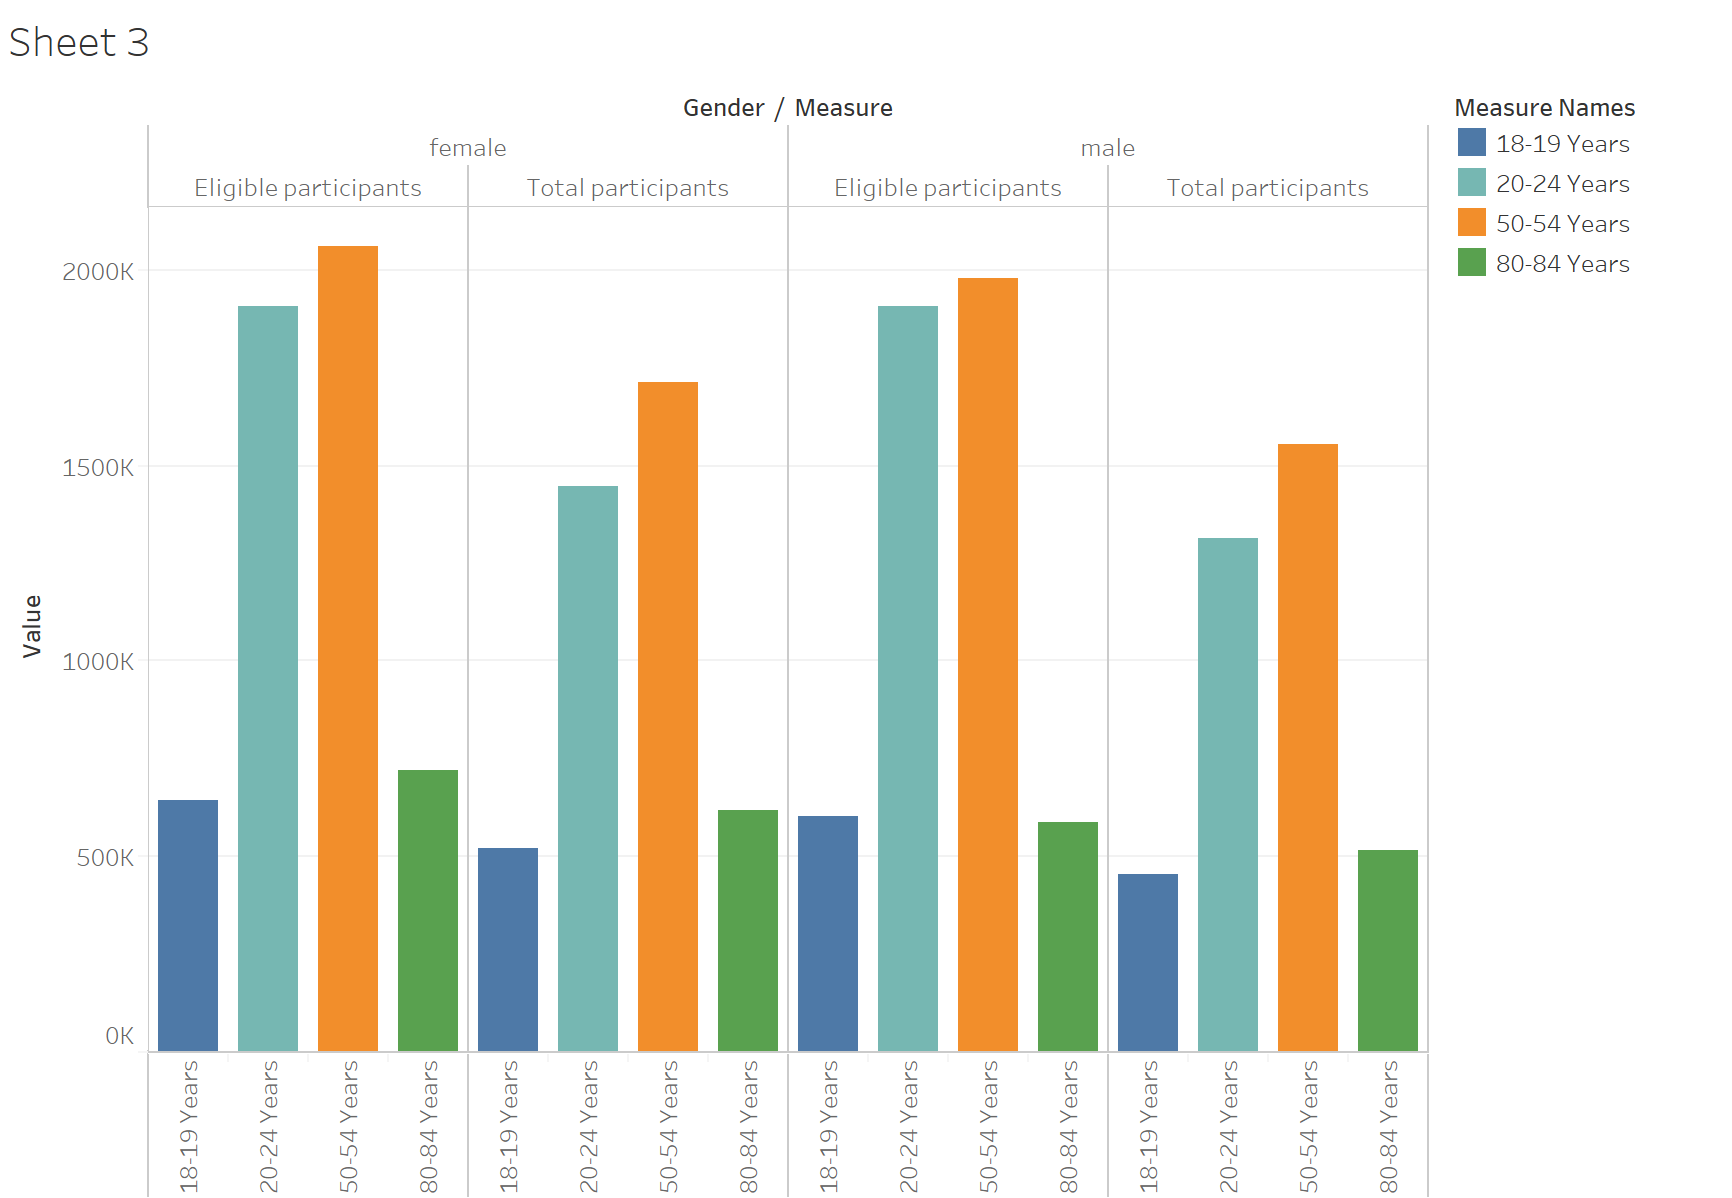

In [175]:
## 
Image(filename='/Users/dilruba_p/Desktop/data/fig1.png')